# Temperature Forecast Project using ML

**Problem Statement:**
Data Set Information:<br>
<br>
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.<br>
<br>
<br>
**Attribute Information:**<br>
<br>
For more information, read [Cho et al, 2020].<br>
1. station - used weather station number: 1 to 25<br>
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')<br>
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6<br>
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9<br>
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5<br>
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100<br>
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5<br>
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6<br>
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9<br>
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4<br>
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97<br>
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97<br>
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98<br>
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97<br>
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7<br>
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6<br>
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8<br>
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7<br>
19. lat - Latitude (Â°): 37.456 to 37.645<br>
20. lon - Longitude (Â°): 126.826 to 127.135<br>
21. DEM - Elevation (m): 12.4 to 212.3<br>
22. Slope - Slope (Â°): 0.1 to 5.2<br>
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9<br>
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9<br>
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T<br>
<br>
Please note that there are two target variables here: <br>
<br>
1) Next_Tmax: Next day maximum temperature<br>
<br>
2) Next_Tmin: Next day  minimum temperature<br>



In [91]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [92]:
# import dataset
data = pd.read_csv('/content/sample_data/temperature.csv')

In [93]:
data.head()

station        Date  Present_Tmax  ...  Solar radiation  Next_Tmax  Next_Tmin
0      1.0  30-06-2013          28.7  ...      5992.895996       29.1       21.2
1      2.0  30-06-2013          31.9  ...      5869.312500       30.5       22.5
2      3.0  30-06-2013          31.6  ...      5863.555664       31.1       23.9
3      4.0  30-06-2013          32.0  ...      5856.964844       31.7       24.3
4      5.0  30-06-2013          31.4  ...      5859.552246       31.2       22.5

[5 rows x 25 columns]

In [94]:
data.shape

(7752, 25)

 - Our dataset 7752 rows and 25 columns.
 - Data looks good and all columns are in numeric.

In [95]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

 - Our dataset have float type of data except date. 
 - We have to convert date column.

# **EDA**

In [96]:
data.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

 - Our dataset have so much null values need to take care of it.

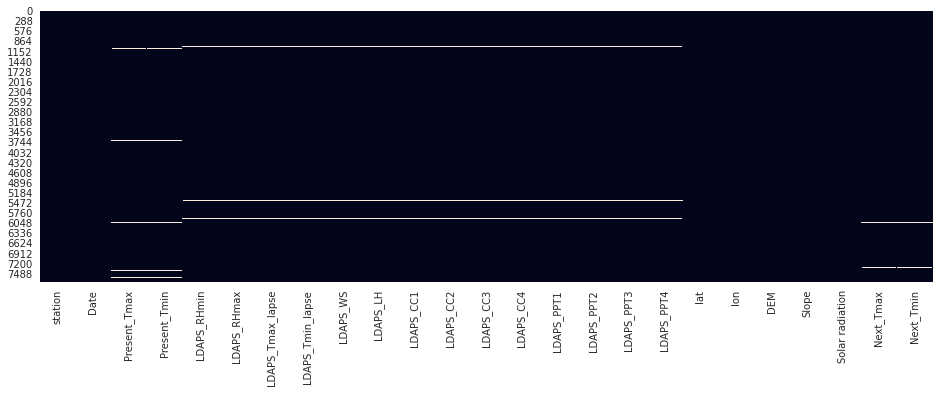

In [97]:
# visualize na by heatmap 
plt.figure(figsize=(16,5))
sns.heatmap(data.isnull(), cbar=False)

In [98]:
# drop the null values

data = data.dropna()

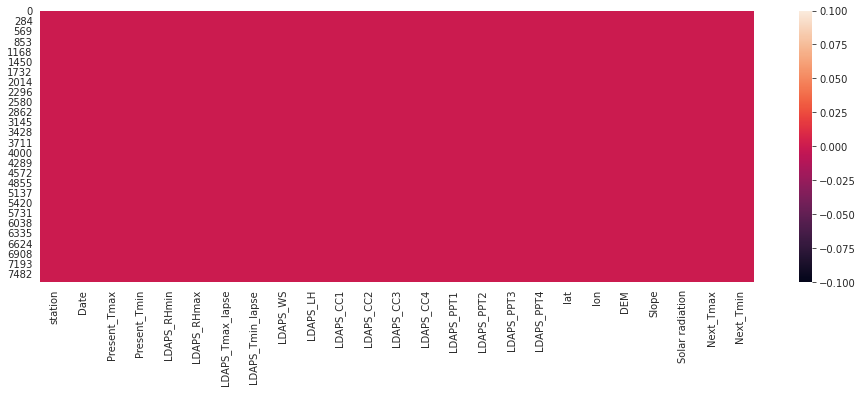

In [99]:
plt.figure(figsize=(16,5))
sns.heatmap(data.isnull())

 - Now, there is no null values.

In [100]:
# check shape of data
data.shape

(7588, 25)

# **Univariate Analysis**

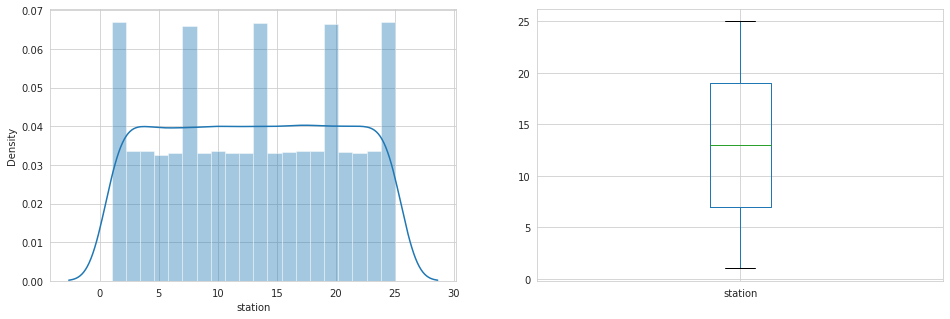

<Figure size 1152x360 with 0 Axes>

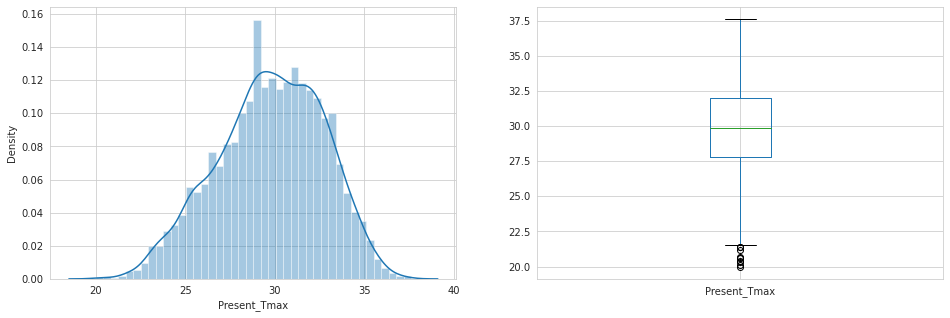

<Figure size 1152x360 with 0 Axes>

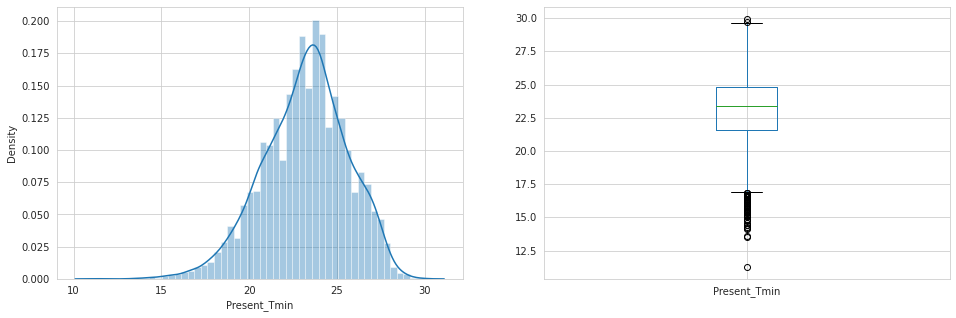

<Figure size 1152x360 with 0 Axes>

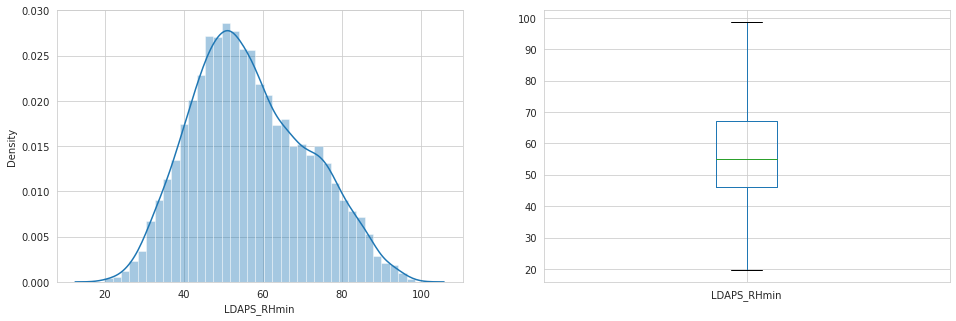

<Figure size 1152x360 with 0 Axes>

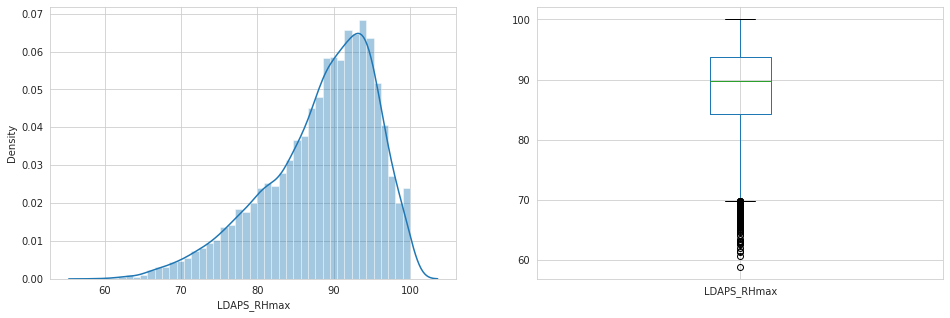

<Figure size 1152x360 with 0 Axes>

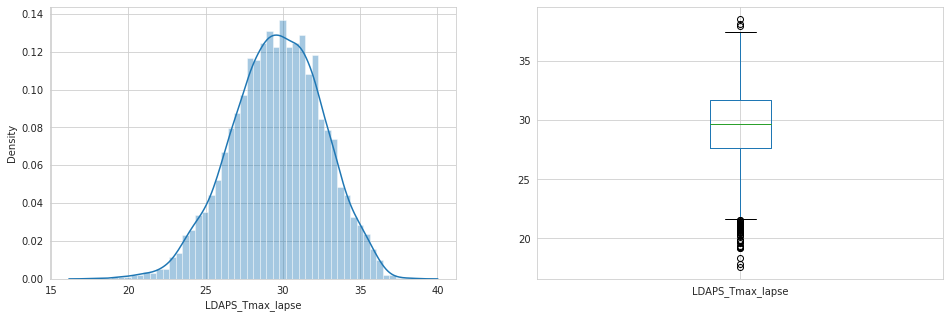

<Figure size 1152x360 with 0 Axes>

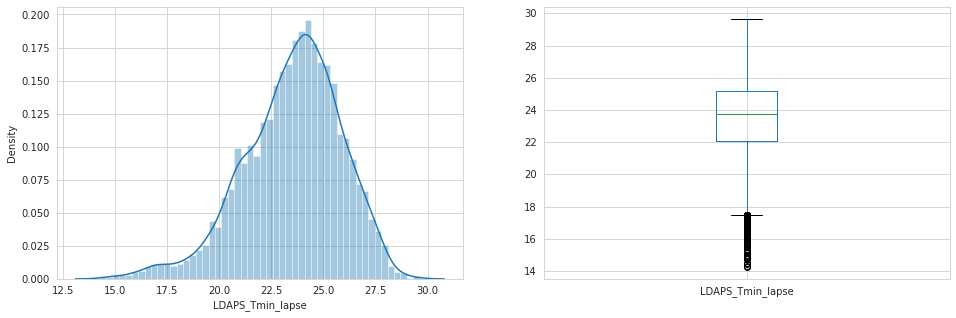

<Figure size 1152x360 with 0 Axes>

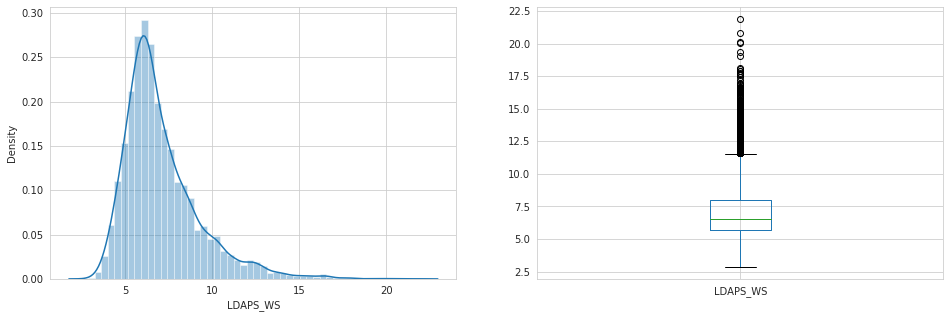

<Figure size 1152x360 with 0 Axes>

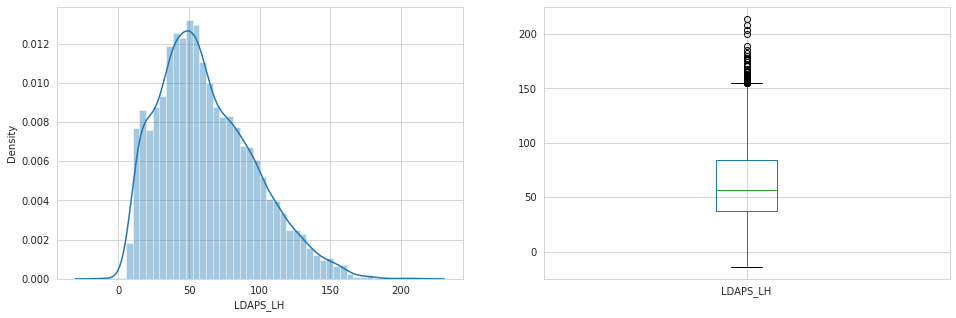

<Figure size 1152x360 with 0 Axes>

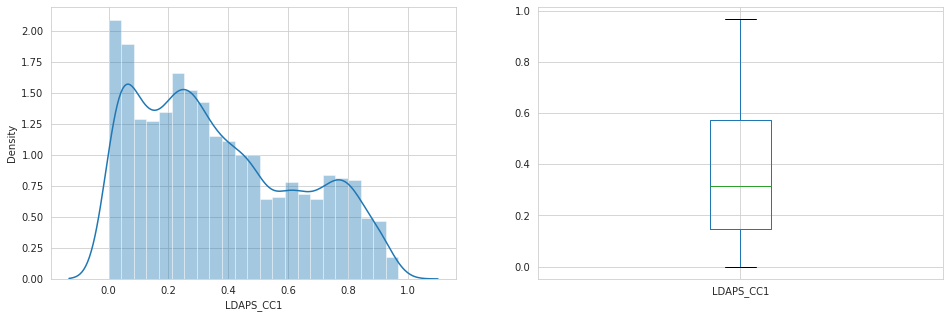

<Figure size 1152x360 with 0 Axes>

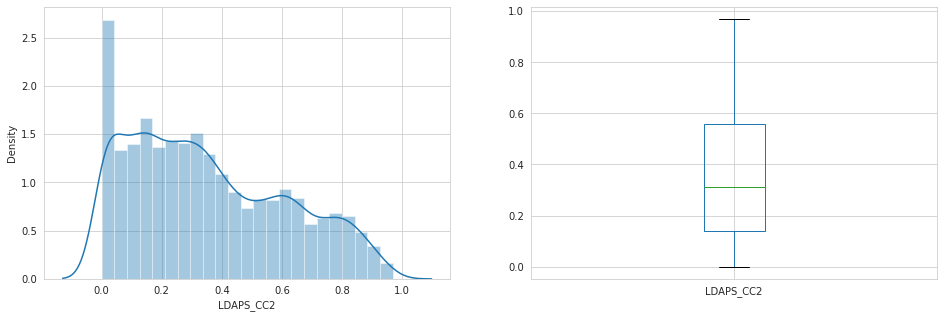

<Figure size 1152x360 with 0 Axes>

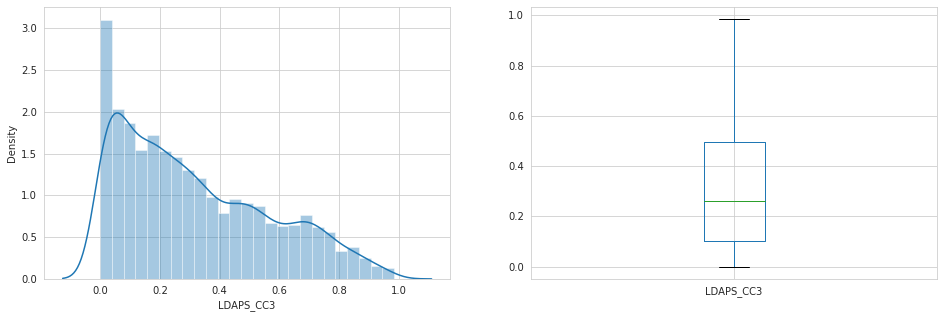

<Figure size 1152x360 with 0 Axes>

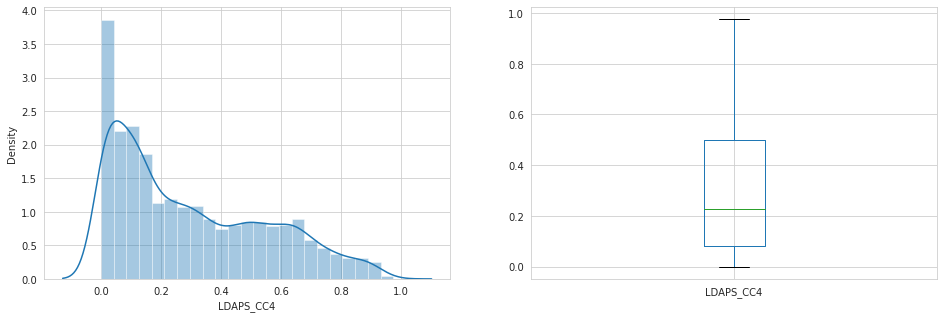

<Figure size 1152x360 with 0 Axes>

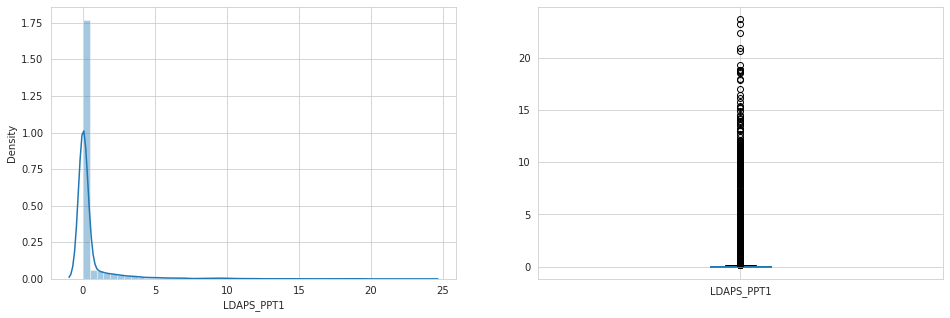

<Figure size 1152x360 with 0 Axes>

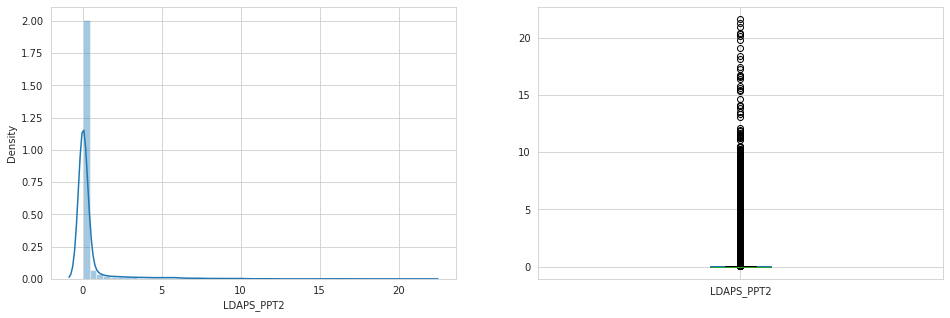

<Figure size 1152x360 with 0 Axes>

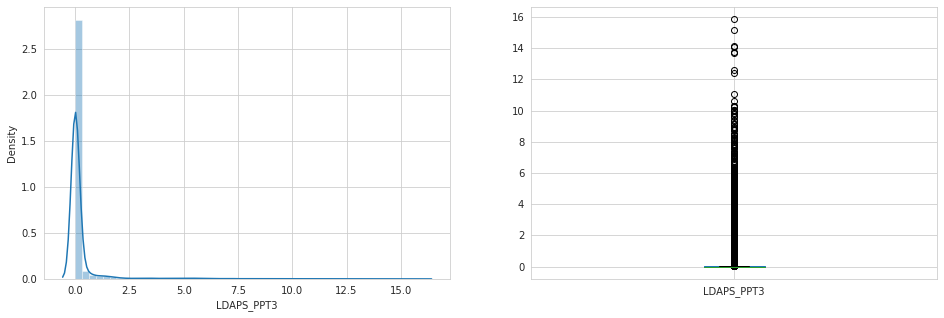

<Figure size 1152x360 with 0 Axes>

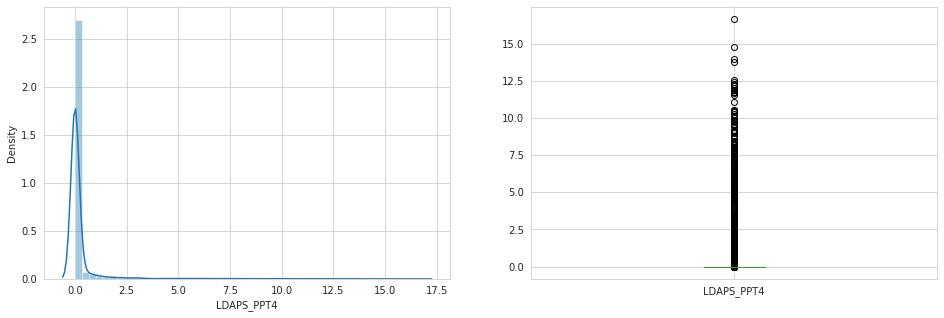

<Figure size 1152x360 with 0 Axes>

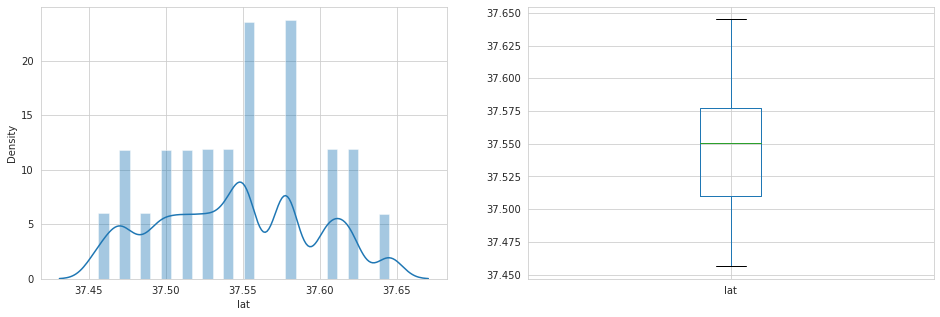

<Figure size 1152x360 with 0 Axes>

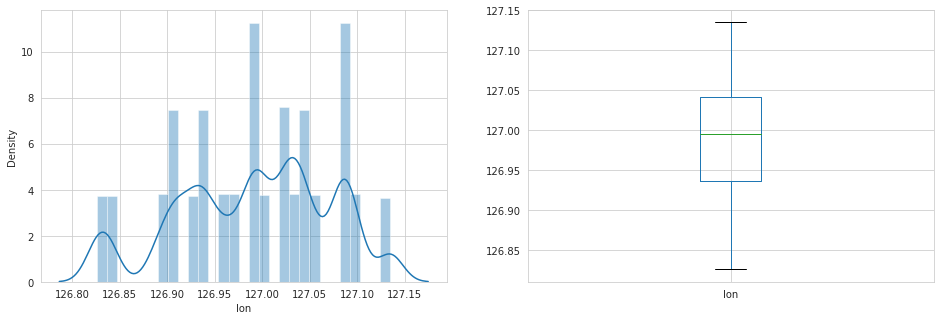

<Figure size 1152x360 with 0 Axes>

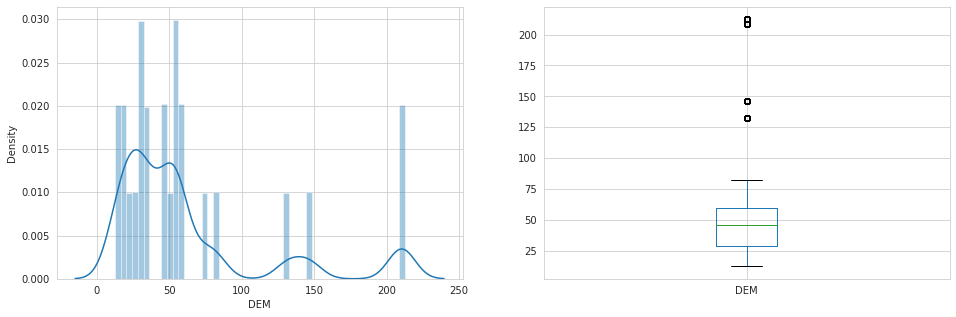

<Figure size 1152x360 with 0 Axes>

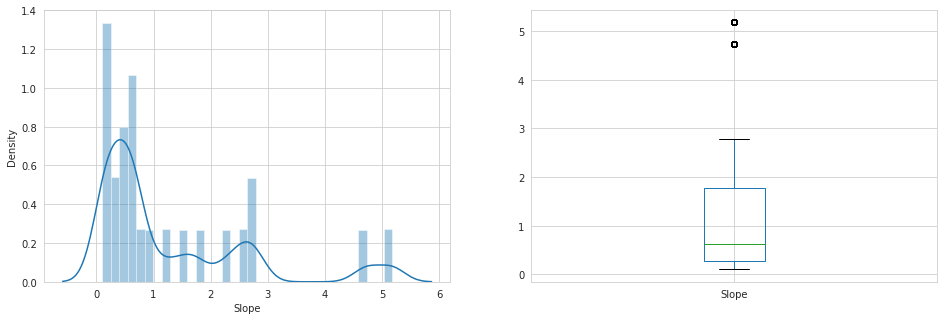

<Figure size 1152x360 with 0 Axes>

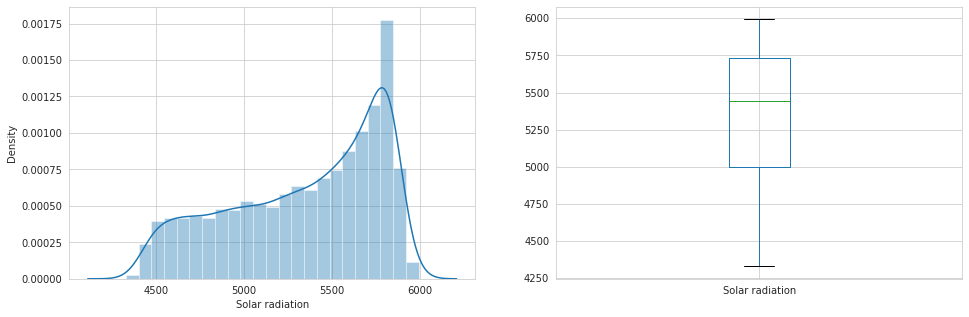

<Figure size 1152x360 with 0 Axes>

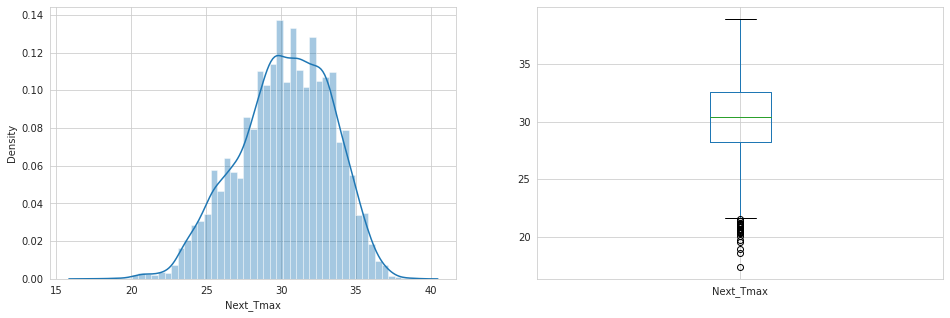

<Figure size 1152x360 with 0 Axes>

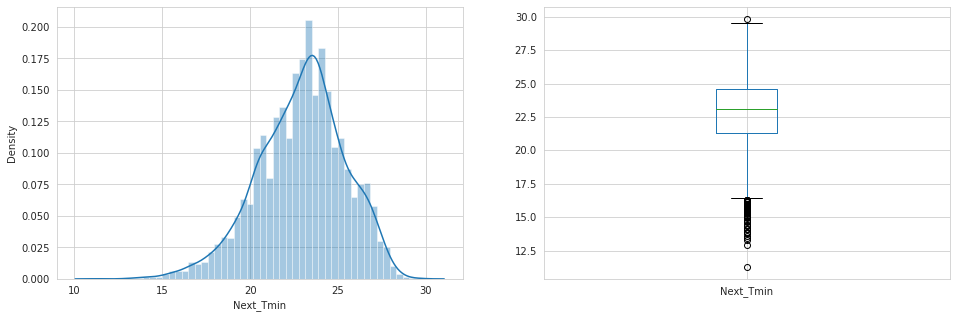

<Figure size 1152x360 with 0 Axes>

In [101]:
collist = list(data.select_dtypes(['float']).columns)
for i in range(0, len(collist)):
  plt.subplot(121)
  sns.distplot(data[collist[i]])
  plt.subplot(122)
  data[collist[i]].plot.box(figsize=(16,5))
  sns.set_style('whitegrid')
  plt.figure(figsize=(16,5))
  plt.show()

In [102]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

 - LDAPS_RHmax,LDAPS_Tmin_lapse,Solar radiation are right skewed.
 - LDAPS_WS,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,Slope are left skewed.
 - There are many columns have outliers need to handle of them.

# **Bi-Variate Analysis**

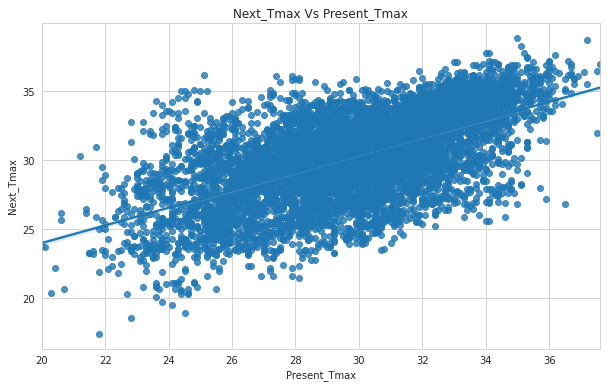

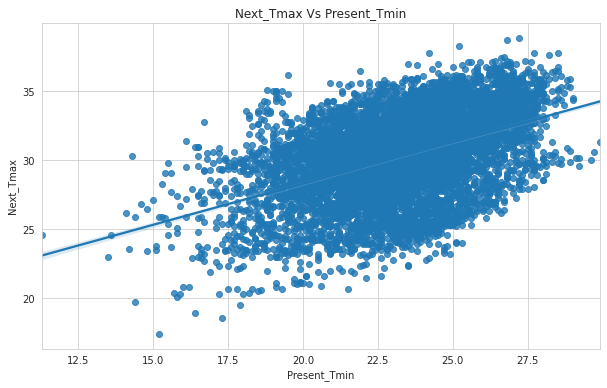

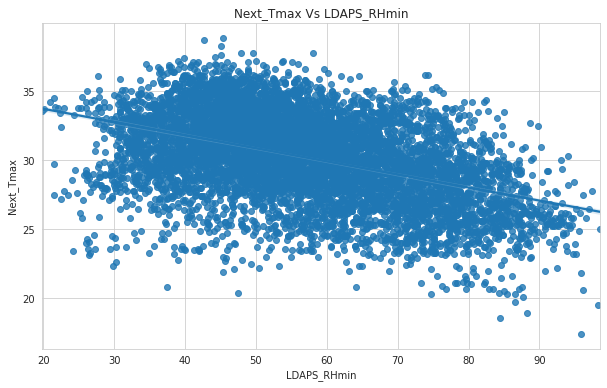

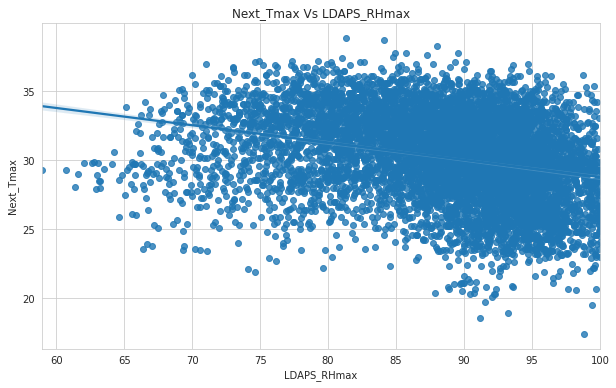

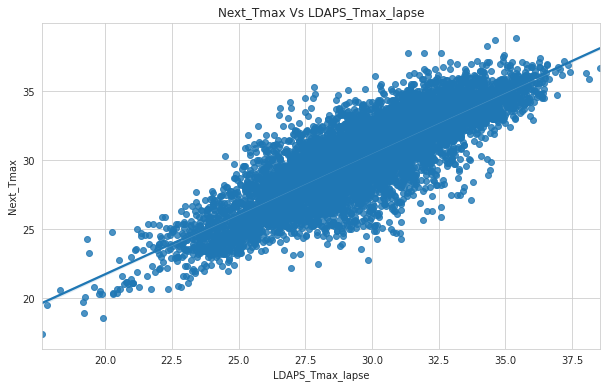

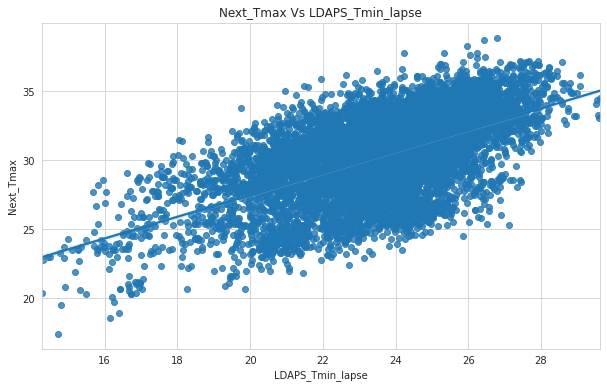

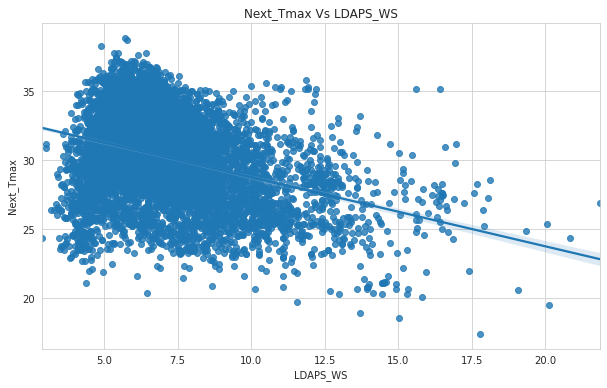

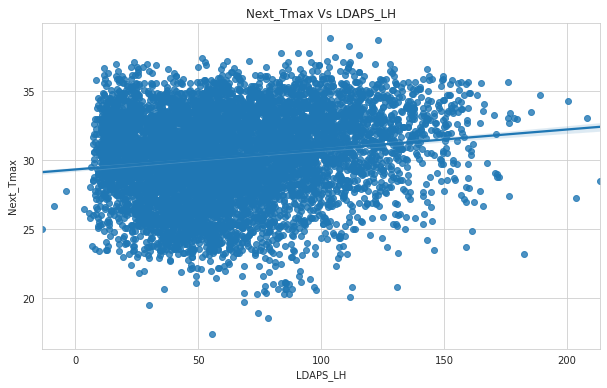

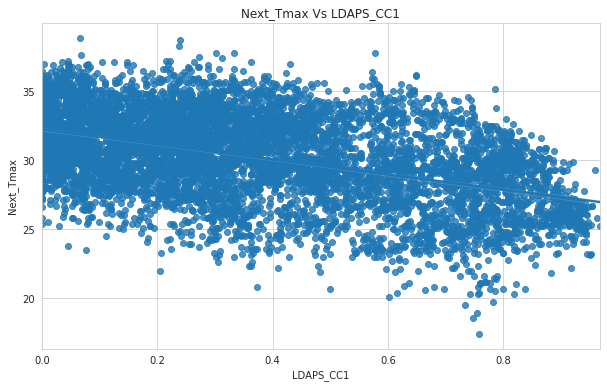

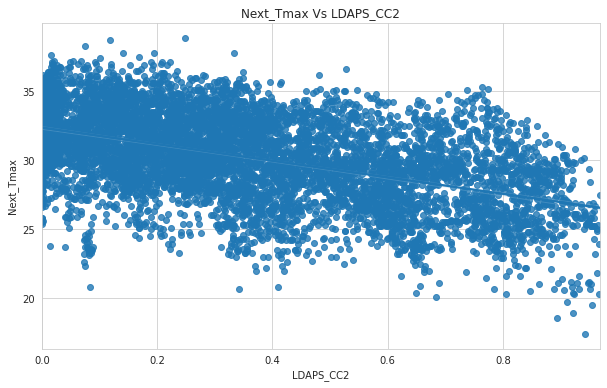

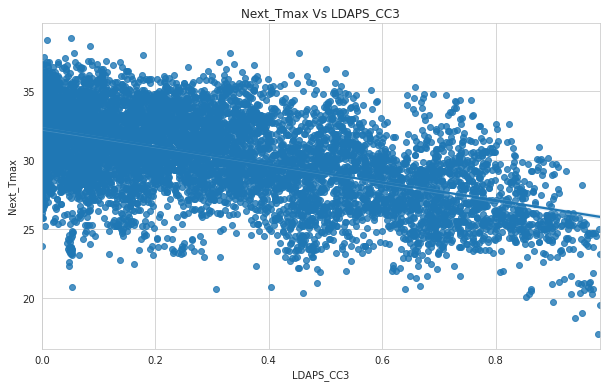

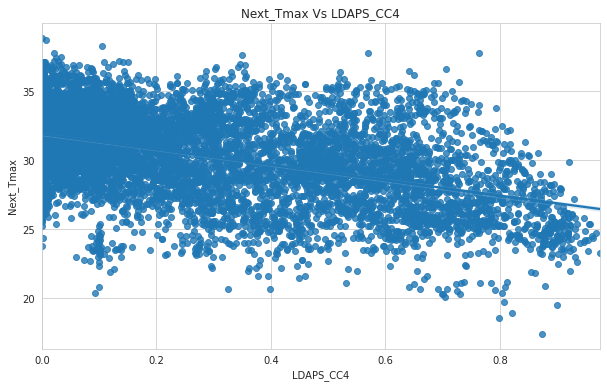

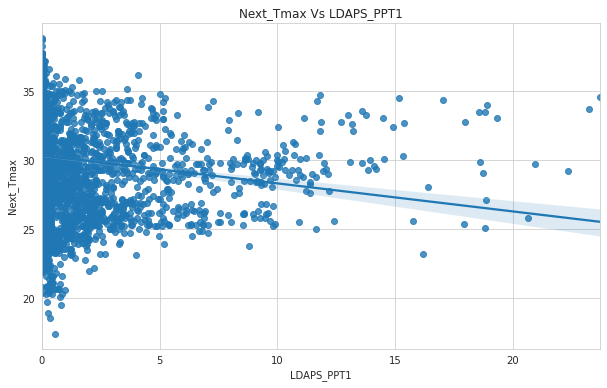

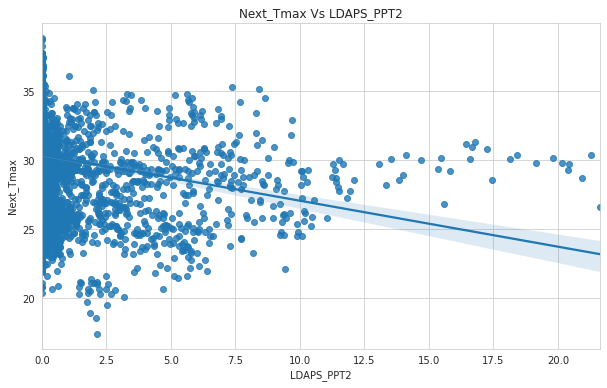

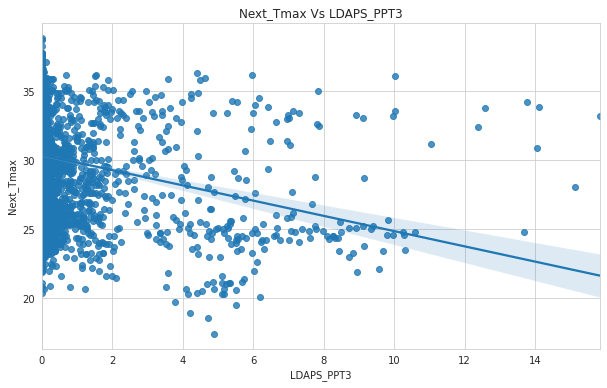

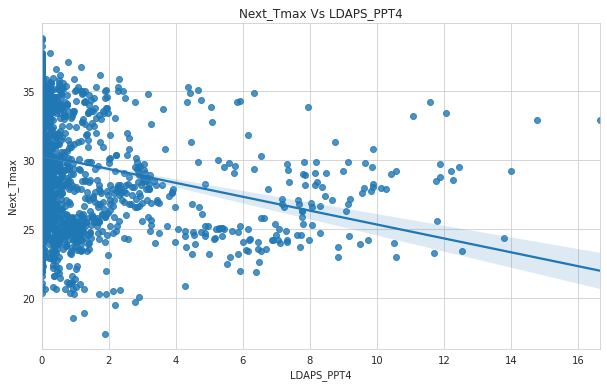

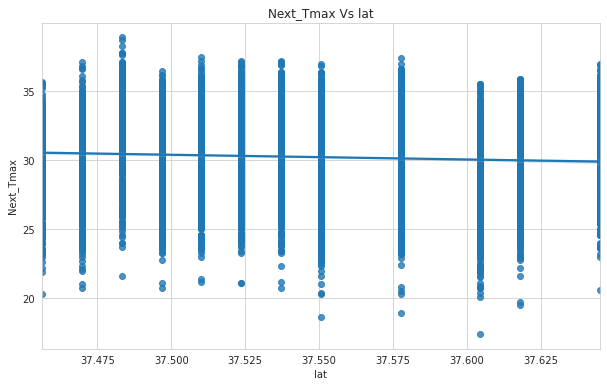

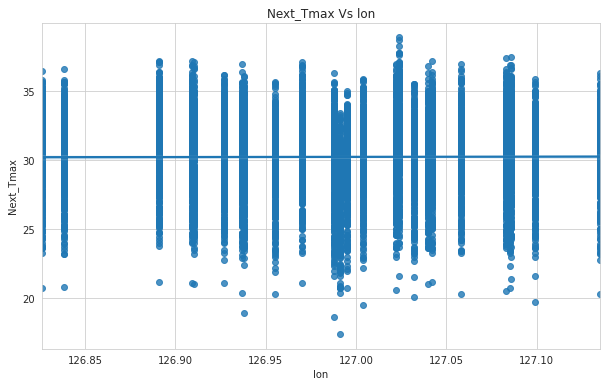

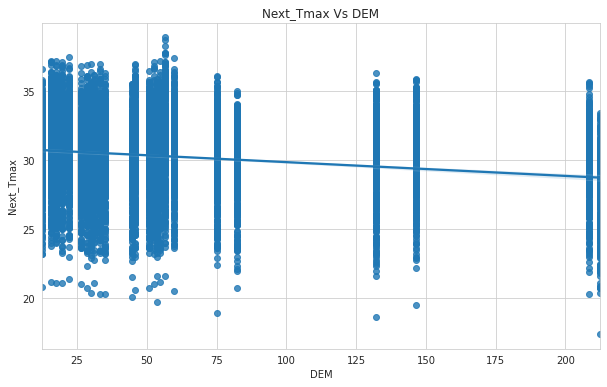

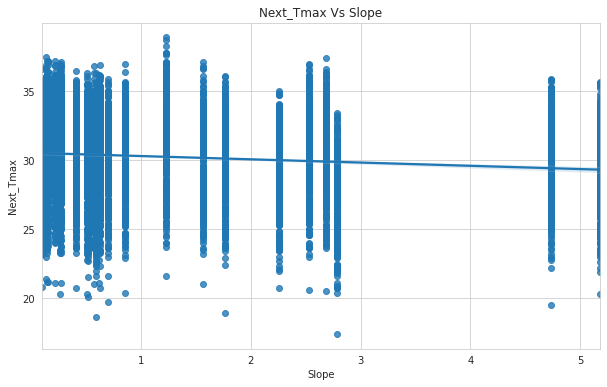

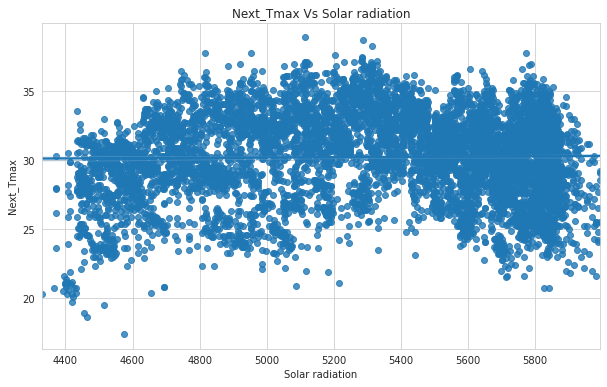

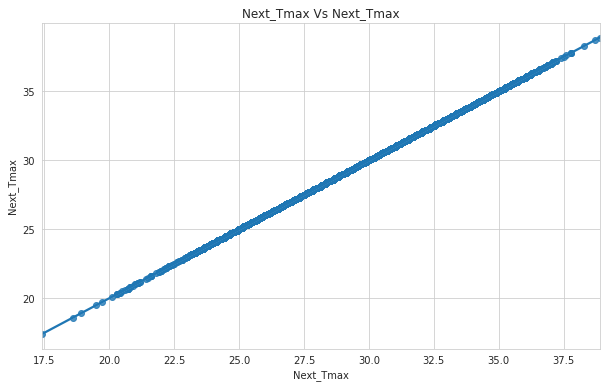

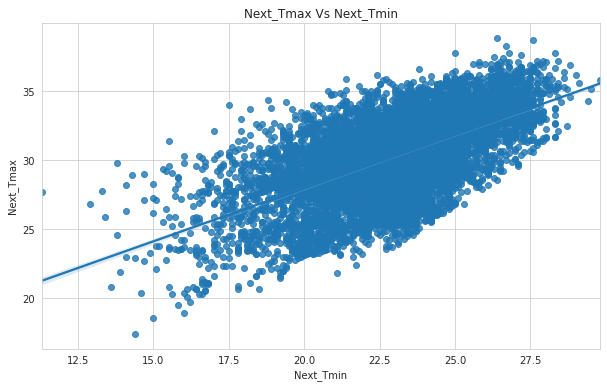

In [103]:
# scatter plot
for i in range(1,len(collist)):
  plt.figure(figsize=(10,6))
  sns.regplot(data[collist[i]], data['Next_Tmax'])
  plt.title('Next_Tmax Vs %s' %(collist[i]))
  plt.xlabel(collist[i])
  plt.ylabel('Next_Tmax')
  plt.show()

In [104]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

 - Present_Tmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Present_Tmin,Next_Tmin have good positive correlation with Next_Tmax.
 - 'LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',   have good negative correlation with Next_Tmax.

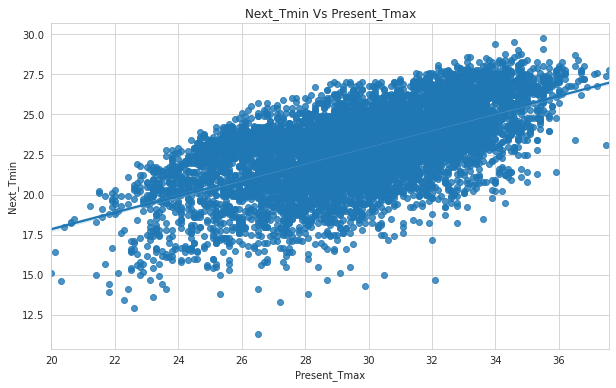

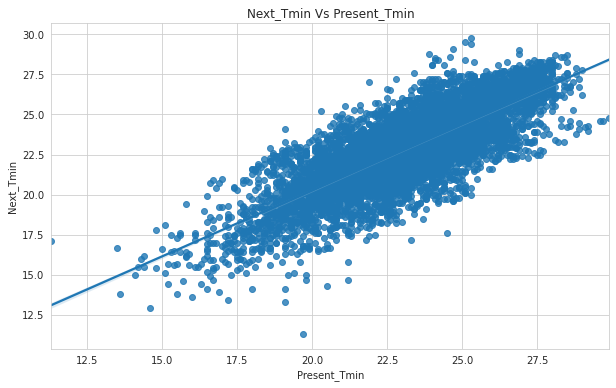

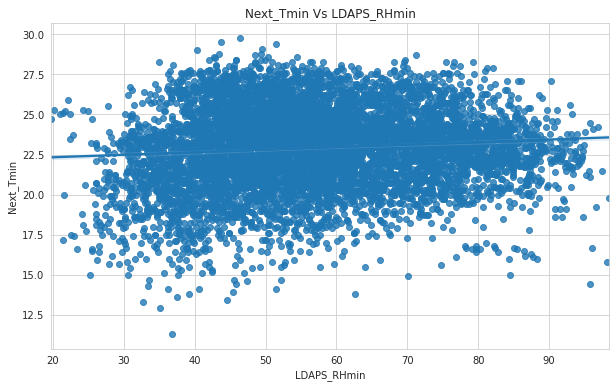

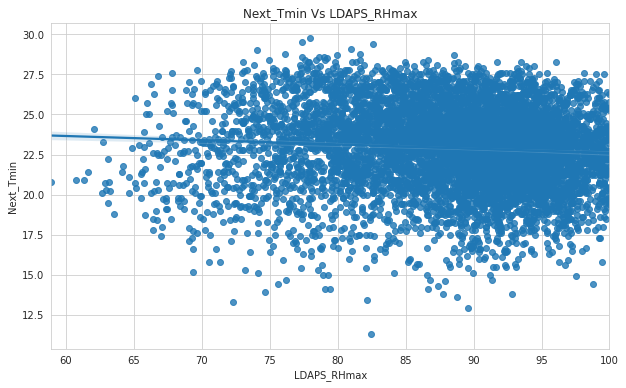

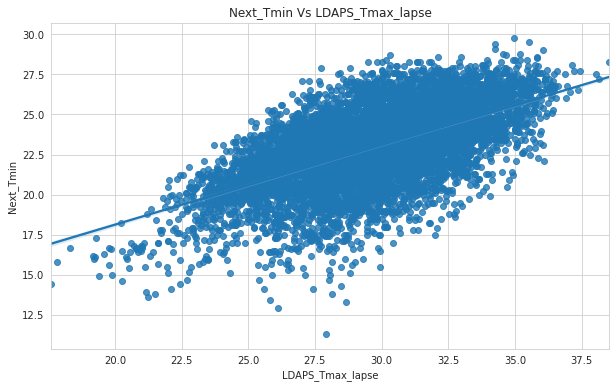

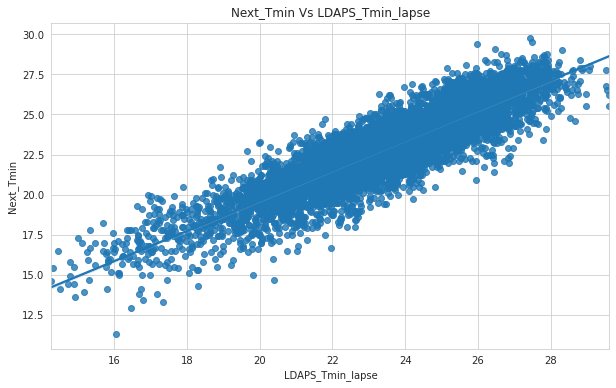

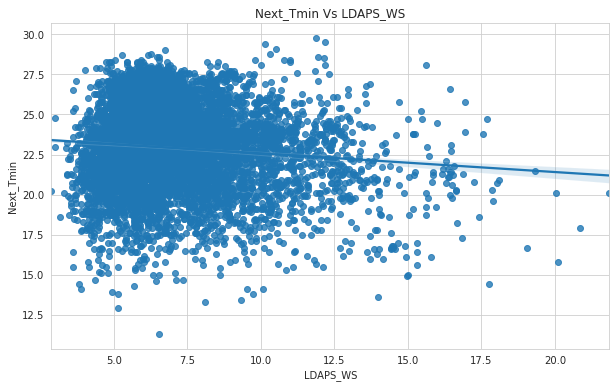

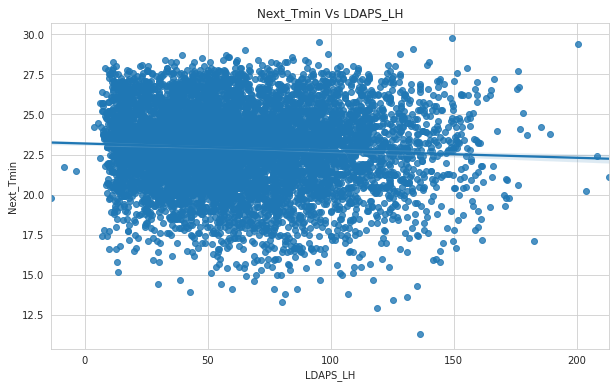

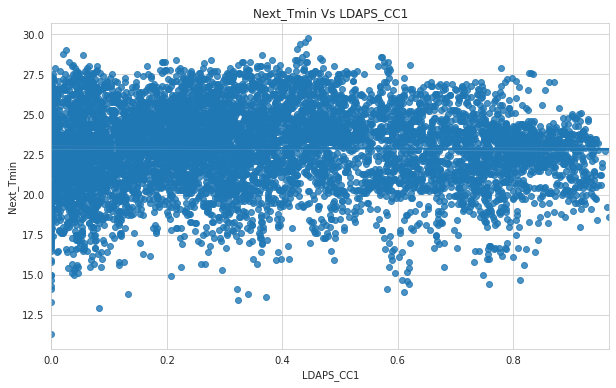

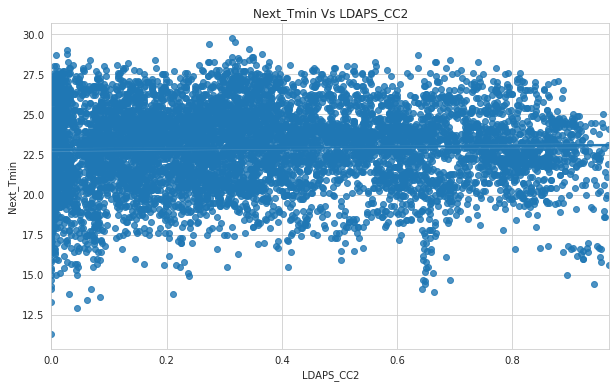

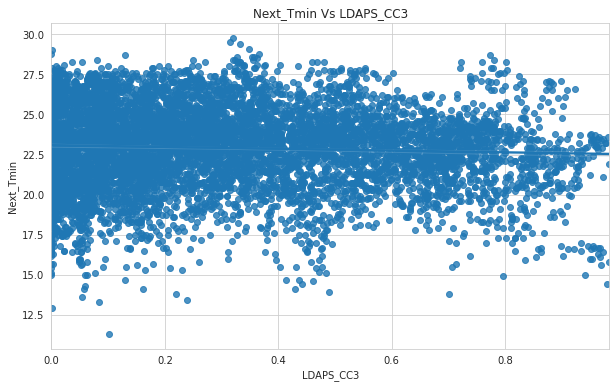

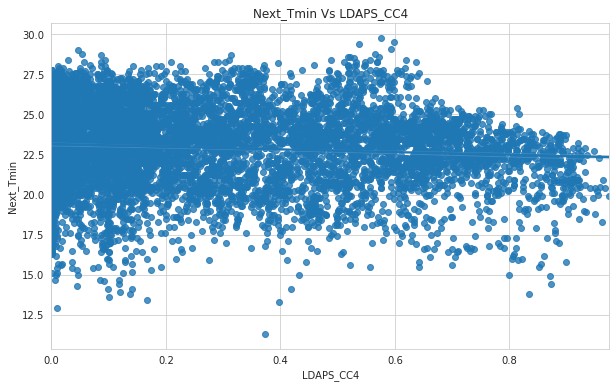

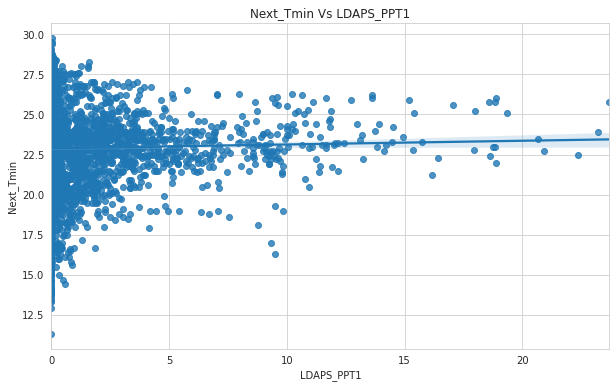

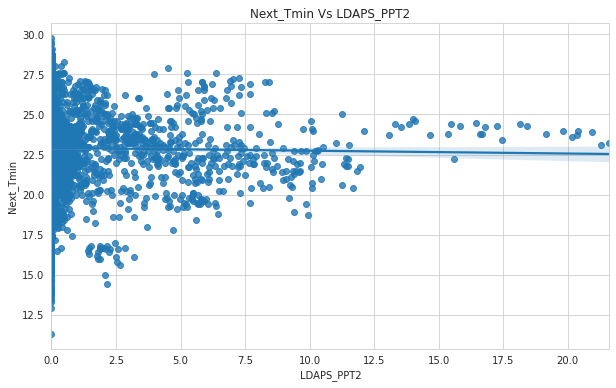

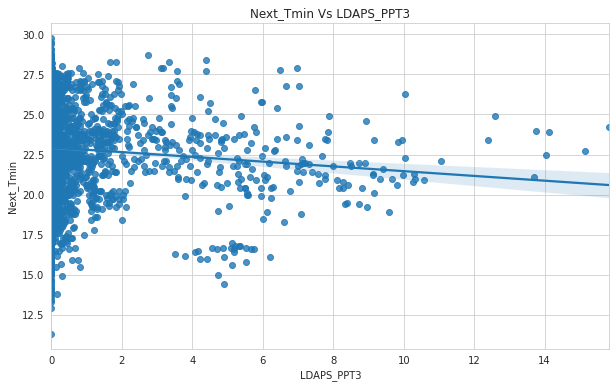

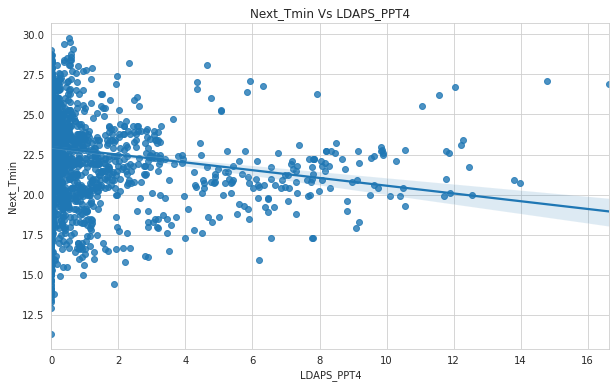

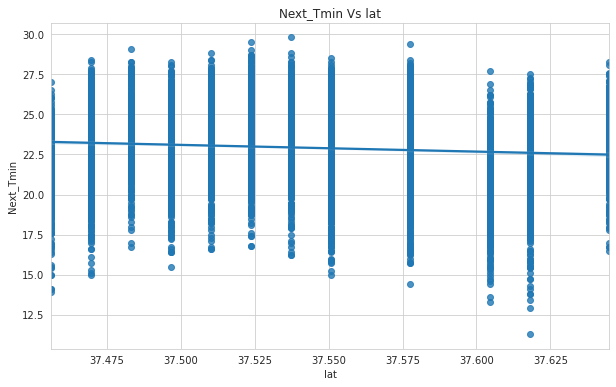

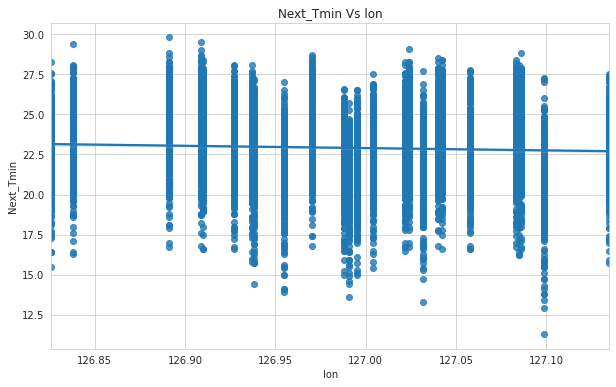

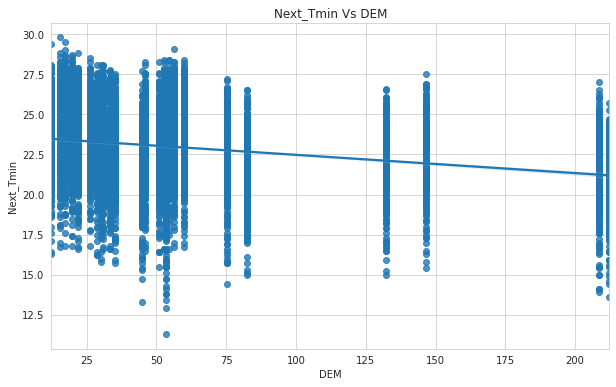

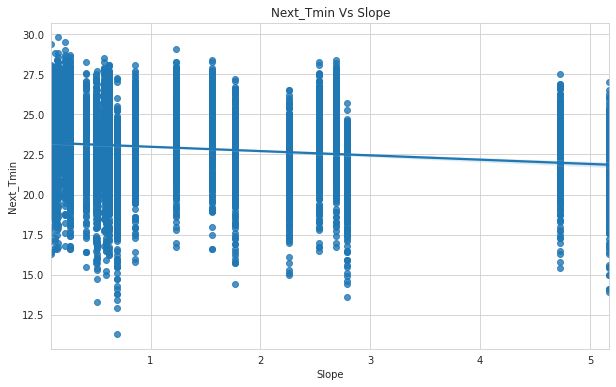

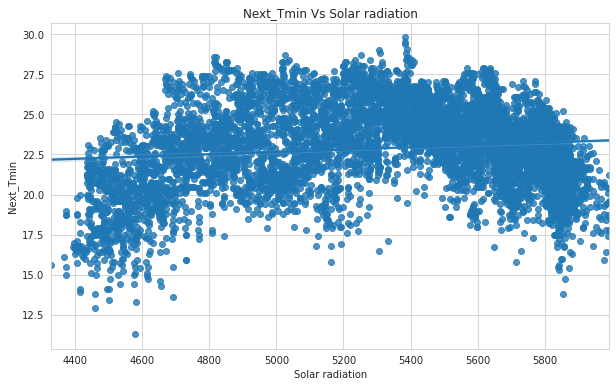

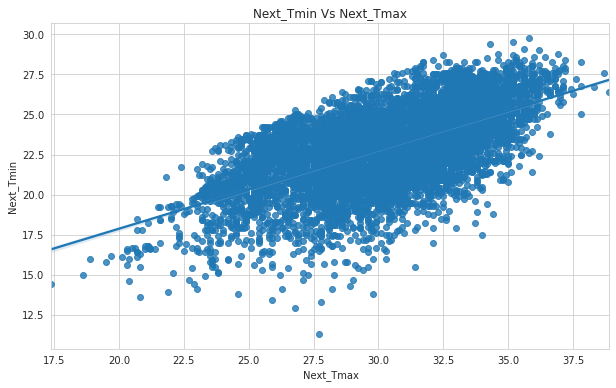

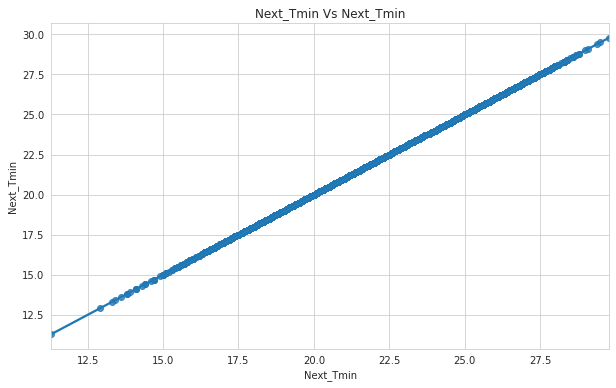

In [105]:
for i in range(1,len(collist)):
  plt.figure(figsize=(10,6))
  sns.regplot(data[collist[i]], data['Next_Tmin'])
  plt.title('Next_Tmin Vs %s' %(collist[i]))
  plt.xlabel(collist[i])
  plt.ylabel('Next_Tmin')
  plt.show()

In [106]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

 - Present_Tmax,Present_Tmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,Next_Tmax have good positive correlation with Next_Tmin

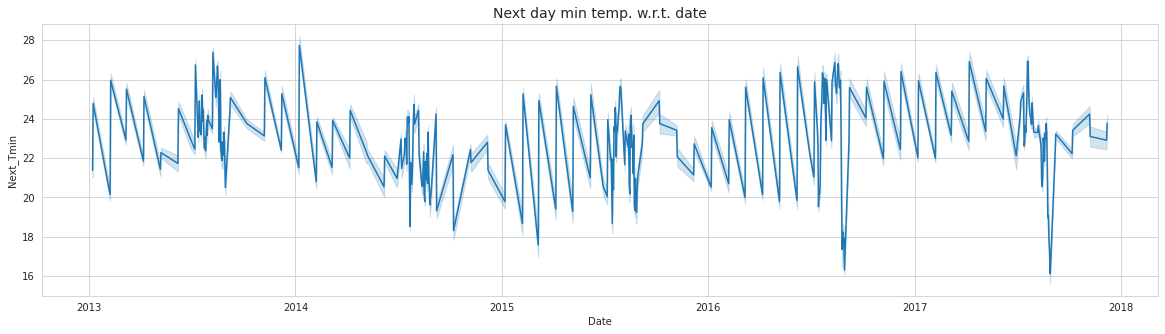

In [107]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='Date', y='Next_Tmin', data=data)
plt.title('Next day min temp. w.r.t. date',fontsize=14)
plt.show()

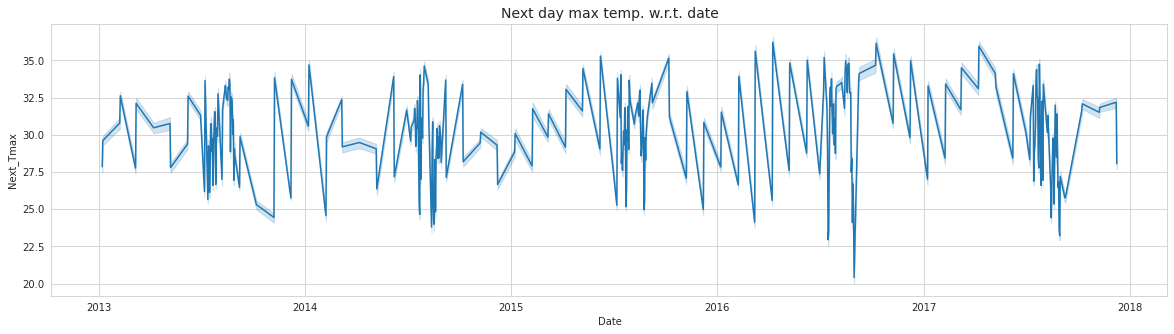

In [108]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='Date', y='Next_Tmax', data=data)
plt.title('Next day max temp. w.r.t. date',fontsize=14)
plt.show()

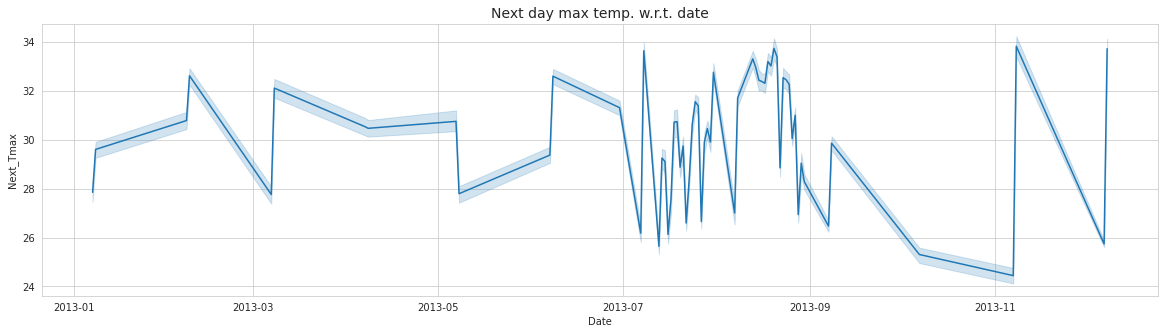

In [109]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='Date', y='Next_Tmax', data=data.iloc[:1500])
plt.title('Next day max temp. w.r.t. date',fontsize=14)
plt.show()

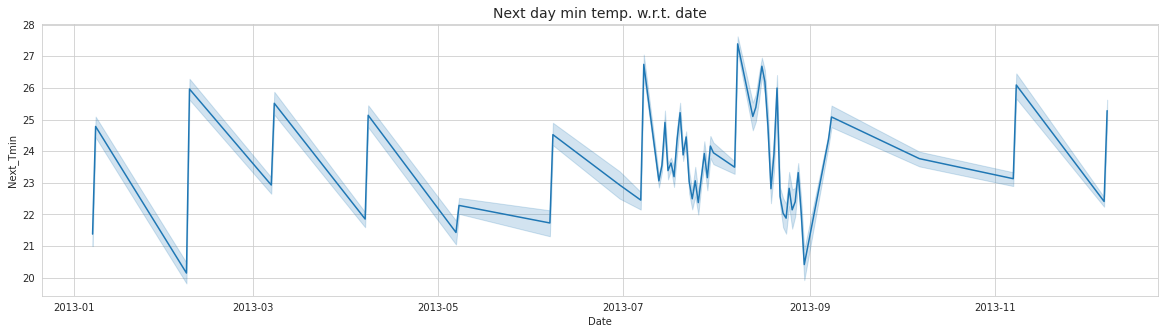

In [110]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='Date', y='Next_Tmin', data=data.iloc[:1500])
plt.title('Next day min temp. w.r.t. date',fontsize=14)
plt.show()

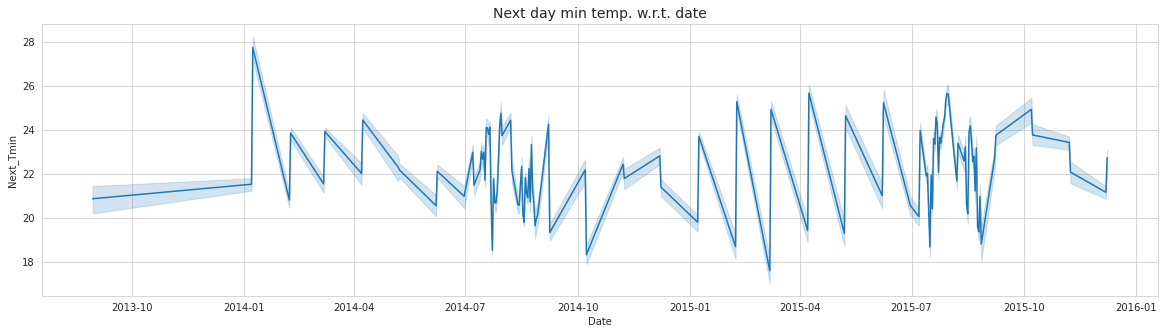

In [111]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='Date', y='Next_Tmin', data=data.iloc[1501:4500])
plt.title('Next day min temp. w.r.t. date',fontsize=14)
plt.show()

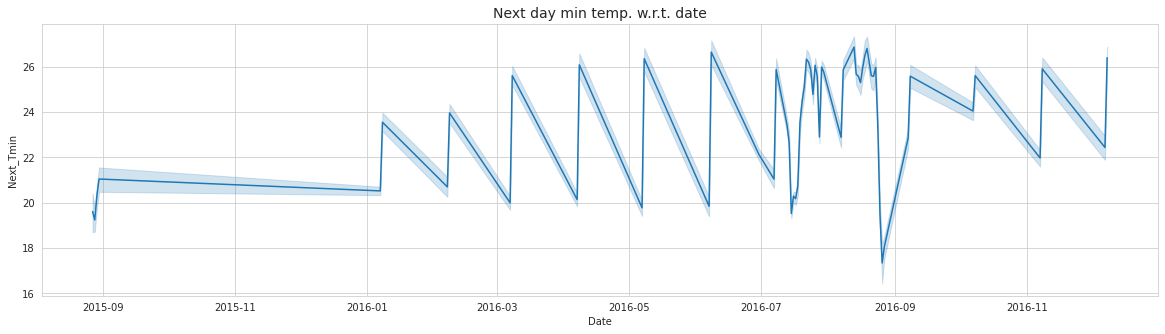

In [112]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='Date', y='Next_Tmin', data=data.iloc[4501:6000])
plt.title('Next day min temp. w.r.t. date',fontsize=14)
plt.show()

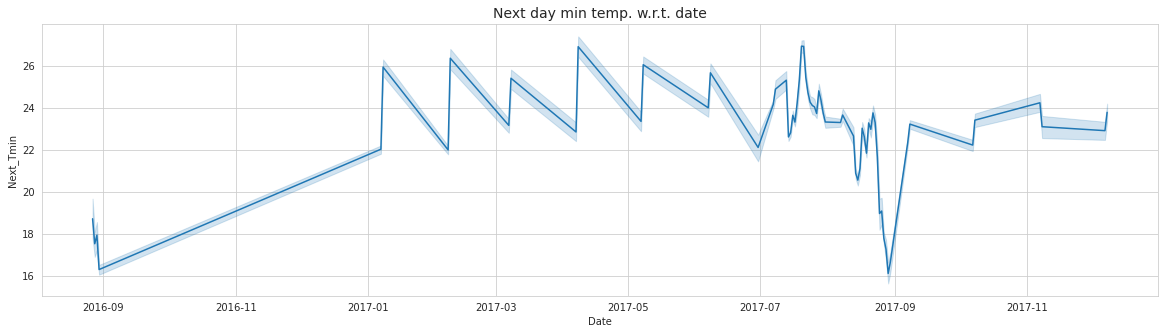

In [113]:
plt.figure(figsize=(20,5))
ax = sns.lineplot(x='Date', y='Next_Tmin', data=data.iloc[6000:])
plt.title('Next day min temp. w.r.t. date',fontsize=14)
plt.show()

From the above plot :
 - For January and February temperature increases.
 - From February to April temprature goes up and down 
 - April to July temperature goes up and down, it always fall under 25-36.
 - From July to september we can see ups and down because of rain.
 - September to november temperature dosen't fluctuate much.
 - From November to december the temperature goes down.
 - From December to January the temperature goes up.

# **Multi-Variate Analysis**

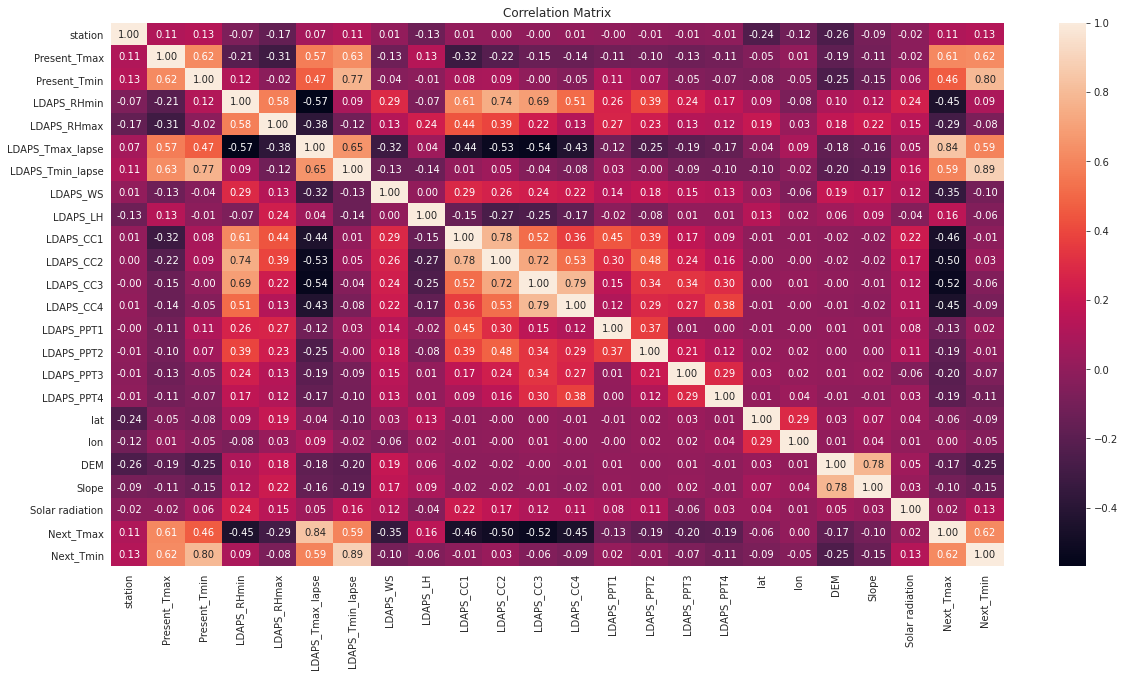

In [114]:
fig = plt.figure(figsize=(20,10))
hc = data.corr(method='pearson')
sns.heatmap(hc, annot=True, fmt='0.2f')
plt.title('Correlation Matrix')
plt.show()

In [115]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

 - 'Present_Tmax', 'Present_Tmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', Next_Tmin have good positive correlation with Next_Tmax.
 - 'Present_Tmax', 'Present_Tmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', Next_Tmin have good positive correlation with Next_Tmin.
 - 'LDAPS_RHmin','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4' have good negative correlation with Next_Tmax.

In [116]:
# describe
data.describe()

station  Present_Tmax  ...    Next_Tmax    Next_Tmin
count  7588.000000   7588.000000  ...  7588.000000  7588.000000
mean     13.014101     29.748366  ...    30.241526    22.910820
std       7.217858      2.967401  ...     3.111807     2.482256
min       1.000000     20.000000  ...    17.400000    11.300000
25%       7.000000     27.800000  ...    28.200000    21.300000
50%      13.000000     29.900000  ...    30.400000    23.100000
75%      19.000000     32.000000  ...    32.600000    24.600000
max      25.000000     37.600000  ...    38.900000    29.800000

[8 rows x 24 columns]

 - LDAPS_RHmax,	LDAPS_Tmax_lapse,	LDAPS_Tmin_lapse,	LDAPS_LH,	LDAPS_CC1,	LDAPS_CC2,	LDAPS_CC3,	LDAPS_CC4,	LDAPS_PPT1,	LDAPS_PPT2,	LDAPS_PPT3,	LDAPS_PPT4,	Slope have skewness because their mean and std had too much difference.
 - LDAPS_PPT1,	LDAPS_PPT2,	LDAPS_PPT3,	LDAPS_PPT4 have many outliers because they have too much difference between 75% and max.	

In [117]:
# changing date to integer for better prediction
import datetime as dt
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].map(dt.datetime.toordinal)
data.head()

station    Date  Present_Tmax  ...  Solar radiation  Next_Tmax  Next_Tmin
0      1.0  735049          28.7  ...      5992.895996       29.1       21.2
1      2.0  735049          31.9  ...      5869.312500       30.5       22.5
2      3.0  735049          31.6  ...      5863.555664       31.1       23.9
3      4.0  735049          32.0  ...      5856.964844       31.7       24.3
4      5.0  735049          31.4  ...      5859.552246       31.2       22.5

[5 rows x 25 columns]

In [118]:
data.dtypes

station             float64
Date                  int64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

 - column Date has been converted into int. 

# **Removing Skewness and Outliers**

In [119]:
# check skewness of data
data.skew()

station            -0.004178
Date                0.011103
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [120]:
# removing skewness of data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for i in data.columns:
  if abs(data.loc[:,i].skew())> 0.5:
    data.loc[:,i]=pt.fit_transform(data.loc[:,i].values.reshape(-1,1))

In [121]:
# removing outliers of the data
from scipy.stats import zscore
z = np.abs(zscore(data))
print(np.where(z>3))

(array([1751, 2091, 2154, 2316, 2413, 2425, 2591, 2599, 2633, 2699, 2700,
       2708, 2733, 3123, 3141, 3147, 3148, 3148, 3166, 3172, 3173, 3223,
       3435, 3437, 3481, 3522, 4281, 4506, 4531, 4656, 4708, 4964, 4989,
       4989, 5014, 5379, 5675, 5949, 5959, 5967, 5972, 5973, 5982, 5983,
       5991, 5997, 5998, 6007, 6007, 6008, 6016, 6023, 6032, 6032, 6033,
       6035, 6041, 6048, 6048, 6050, 6051, 6057, 6057, 6057, 6057, 6058,
       6058, 6058, 6059, 6059, 6060, 6060, 6061, 6061, 6062, 6063, 6063,
       6065, 6065, 6066, 6066, 6066, 6067, 6068, 6068, 6068, 6069, 6069,
       6071, 6071, 6072, 6072, 6073, 6073, 6073, 6074, 6075, 6075, 6076,
       6076, 6077, 6117, 6140, 6957, 6970, 6971, 6979, 6980, 6981, 7450,
       7457, 7474, 7481, 7506, 7515, 7515, 7539, 7539, 7539, 7539, 7539,
       7540, 7547, 7549, 7553, 7554, 7556, 7557, 7557, 7563, 7563, 7563,
       7564, 7564, 7571, 7572, 7572, 7574, 7578, 7579, 7579, 7581, 7582]), array([ 9,  8,  8,  9,  8,  8,  8,  8,  2,  8,  

In [122]:
# checking the shape of data
df = data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)

(7588, 25)
(7482, 25)


In [123]:
# check how much data we lost
loss_percent = (7588-7482)/7588*100
print(loss_percent)

1.39694254085398


 - We've lost almost 1.4% data, which is ok.

# **Split X & Y**

In [124]:
y1 = df['Next_Tmax']
y2 = df['Next_Tmin']
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1, inplace=True)

In [125]:
x = df

In [126]:
x.head()

station    Date  Present_Tmax  ...       DEM     Slope  Solar radiation
0      1.0  735049          28.7  ...  1.833902  1.311979         1.852498
1      2.0  735049          31.9  ...  0.055065 -0.387168         1.398583
2      3.0  735049          31.6  ... -0.365481 -0.950272         1.378325
3      4.0  735049          32.0  ...  0.083964  1.233016         1.355226
4      5.0  735049          31.4  ... -0.291349 -0.403544         1.364282

[5 rows x 23 columns]

# **Scaling**

In [127]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
x = mms.fit_transform(x)

In [128]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

# **Finding Best Random State**

## **Next_Tmax**

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

maxR2_score = 0
maxRS = 0

for i in range(1,1000):
  x_train,x_test,y1_train,y1_test = train_test_split(x, y1, test_size=0.30, random_state=i)
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  pred_lr = lr.predict(x_test)
  score = r2_score(y1_test, pred_lr)
  if score>maxR2_score:
    maxR2_score=score
    maxRS=i
print('Best Accuracy is',maxR2_score,'on Randon_State',maxRS)

Best Accuracy is 0.7658047307603845 on Randon_State 1


In [130]:
x_train,x_test,y1_train,y1_test = train_test_split(x, y1, test_size=0.30, random_state=maxRS)

In [131]:
# importing all the required libraries to find the best algorithm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [132]:
model = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),Ridge(),SVR()]
for i in model:
  print('***********************************************************************')
  print('***********************************************************************')
  print('Accuracy Score  :',i)
  i.fit(x_train,y1_train)
  pred = i.predict(x_test)
  print('r2 score : ',r2_score(y1_test,pred))
  print('Mean absolute error : ',mean_absolute_error(y1_test,pred))
  print('Mean squared error : ',mean_squared_error(y1_test,pred))
  print('Root Mean squared error : ',np.sqrt(mean_squared_error(y1_test,pred)))
  score = cross_val_score(i,x,y1,cv=8)
  print(score)
  print('Cross Validation Score :', score.mean())
  print('Difference between R2 score and cross validation score is : ', r2_score(y1_test,pred)-abs(score.mean()))

***********************************************************************
***********************************************************************
Accuracy Score  : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
r2 score :  0.7658047307603845
Mean absolute error :  1.1141532297768746
Mean squared error :  2.1460425632473106
Root Mean squared error :  1.464937733573448
[0.59381378 0.69539358 0.62136392 0.64180942 0.72098866 0.73331502
 0.77371424 0.64118124]
Cross Validation Score : 0.6776974836606761
Difference between R2 score and cross validation score is :  0.08810724709970841
***********************************************************************
***********************************************************************
Accuracy Score  : RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
    

 - Ridge have very low cross validation difference with accuracy score is :  8.7% so we'll learn our model with Ridge.

# **Hyper Parameter Tuning**

## **Ridge for Next_Tmax**

In [136]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' : [0,10,20],
              'random_state' : [15,16,17],
              'solver' : ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd = Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x_train, y1_train)
clf.best_params_

{'max_iter': 20, 'random_state': 17, 'solver': 'sag'}

In [137]:
clf_pred = clf.best_estimator_.predict(x_test)

In [138]:
r2_score(y1_test, clf_pred)

0.7660106173903439

 - Our model learnt almost 77% for Next_Tmax

# **Save the model**

In [143]:
import joblib
joblib.dump(clf.best_estimator_, 'Temperature_Tmax.obj')
RF_from_joblib = joblib.load('Temperature_Tmax.obj')
predicted = RF_from_joblib.predict(x_test)
predicted

array([31.35764801, 34.6463958 , 34.26312277, ..., 34.32003234,
       27.71310099, 28.72980645])

In [147]:
pd.set_option('display.max_rows',None,'display.max_columns',None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y1_test[:]], index=['Predicted', 'Original'])

0          1          2         3          4          5     \
Predicted  31.357648  34.646396  34.263123  32.11639  29.892087  34.000089   
Original   31.300000  35.600000  33.900000  34.00000  28.400000  35.500000   

                6          7          8         9          10        11    \
Predicted  29.053739  32.557401  28.596054  31.64192  28.666985  30.69448   
Original   28.600000  32.700000  29.200000  31.90000  26.600000  30.20000   

                12         13        14         15         16         17    \
Predicted  33.659398  33.477977  31.19097  32.251388  31.538143  27.400517   
Original   33.600000  34.100000  31.00000  26.900000  32.000000  26.500000   

                18         19         20         21         22         23    \
Predicted  30.663677  26.258703  29.402565  28.445505  33.819423  31.938654   
Original   30.800000  26.600000  30.900000  23.800000  33.800000  32.100000   

                24         25         26         27        28         29    \
Predicted  31.692436  32.600711  32.836859  28.651901  31.43629  31.823521   
Original   30.200000  32.300000  33.100000  29.300000  30.60000  34.900000   

                30         31         32         33         34         35    \
Predicted  34.639257  29.348808  33.265992  33.120975  30.752544  26.843144   
Original   34.800000  29.900000  35.700000  32.900000  30.400000  27.900000   

                36         37         38         39        40        41    \
Predicted  36.054128  35.445958  29.583268  28.985263  35.28633  30.74346   
Original   35.900000  34.900000  29.200000  26.700000  34.60000  30.90000   

              42         43         44        45         46         47    \
Predicted  30.7992  31.873603  27.019558  31.15301  29.795967  31.659793   
Original   29.3000  31.000000  27.900000  30.20000  30.200000  29.200000   

                48         49         50         51         52         53    \
Predicted  33.657179  30.870197  30.878604  24.470189  30.671318  29.198187   
Original   33.600000  30.400000  30.600000  23.600000  28.800000  30.200000   

                54         55         56         57         58         59    \
Predicted  31.435768  27.870896  24.405764  30.506381  31.616976  31.572976   
Original   34.000000  26.000000  23.400000  32.200000  32.500000  29.300000   

                60         61         62         63         64         65    \
Predicted  27.943471  27.009564  33.156974  30.177783  30.816449  31.227579   
Original   29.400000  25.000000  32.000000  28.700000  28.200000  27.600000   

                66         67         68         69         70         71    \
Predicted  28.368379  31.444356  25.474958  33.420643  25.004607  27.698997   
Original   27.500000  31.300000  24.200000  32.900000  24.800000  29.300000   

                72        73         74         75         76         77    \
Predicted  30.132839  34.21236  31.511979  31.040189  30.239158  31.966476   
Original   34.300000  33.80000  27.400000  29.800000  27.900000  32.200000   

              78         79         80         81         82         83    \
Predicted  30.0385  33.479889  24.730787  26.510551  30.648792  32.888456   
Original   31.1000  34.800000  24.200000  26.400000  30.700000  34.800000   

               84        85        86         87         88         89    \
Predicted  31.76016  31.56532  24.33451  28.947307  36.734315  31.420221   
Original   32.50000  30.80000  23.00000  27.100000  36.200000  31.000000   

               90         91         92         93         94         95    \
Predicted  34.44447  31.526496  31.531608  26.956981  30.699106  33.289873   
Original   33.20000  30.500000  33.400000  25.200000  31.200000  34.500000   

                96         97         98         99         100        101   \
Predicted  34.918235  35.459023  28.284337  33.905736  28.862595  31.758141   
Original   34.200000  36.900000  29.300000  33.000000  27.500000  30.700000   

                102  

## **Next_Tmin**

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

maxR2_score = 0
maxRS = 0

for i in range(1,1000):
  x_train,x_test,y2_train,y2_test = train_test_split(x, y2, test_size=0.30, random_state=i)
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  pred_lr = lr.predict(x_test)
  score = r2_score(y2_test, pred_lr)
  if score>maxR2_score:
    maxR2_score=score
    maxRS=i
print('Best Accuracy is',maxR2_score,'on Randon_State',maxRS)

Best Accuracy is 0 on Randon_State 0


In [150]:
model = [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),Ridge(),SVR()]
for i in model:
  print('***********************************************************************')
  print('***********************************************************************')
  print('Accuracy Score  :',i)
  i.fit(x_train,y2_train)
  pred = i.predict(x_test)
  print('r2 score : ',r2_score(y2_test,pred))
  print('Mean absolute error : ',mean_absolute_error(y2_test,pred))
  print('Mean squared error : ',mean_squared_error(y2_test,pred))
  print('Root Mean squared error : ',np.sqrt(mean_squared_error(y2_test,pred)))
  score = cross_val_score(i,x,y2,cv=8)
  print(score)
  print('Cross Validation Score :', score.mean())
  print('Difference between R2 score and cross validation score is : ', r2_score(y2_test,pred)-abs(score.mean()))

***********************************************************************
***********************************************************************
Accuracy Score  : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
r2 score :  0.8282402565111526
Mean absolute error :  0.7711304072564239
Mean squared error :  0.9657540138304967
Root Mean squared error :  0.9827278432152499
[0.51198221 0.83772098 0.63977498 0.75502167 0.80512725 0.80896123
 0.85169085 0.8702346 ]
Cross Validation Score : 0.7600642203169314
Difference between R2 score and cross validation score is :  0.06817603619422119
***********************************************************************
***********************************************************************
Accuracy Score  : RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
   

Ridge have very low cross validation difference with accuracy score is : 6.7% so we'll learn our model with Ridge.

# **Hyper Parameter Tuning**

In [151]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_iter' : [0,10,20],
              'random_state' : [15,16,17],
              'solver' : ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd = Ridge()

clf = GridSearchCV(Ridge(), parameters, cv=5)
clf.fit(x_train, y2_train)
clf.best_params_

{'max_iter': 10, 'random_state': 16, 'solver': 'sag'}

In [152]:
clf_pred = clf.best_estimator_.predict(x_test)

In [153]:
r2_score(y2_test, clf_pred)

0.828202723724171

Our model learnt almost 83% for Next_Tmin.

# **Save the model**

In [154]:
import joblib
joblib.dump(clf.best_estimator_, 'Temperature_Tmin.obj')
RF_from_joblib = joblib.load('Temperature_Tmin.obj')
predicted = RF_from_joblib.predict(x_test)
predicted

array([20.04577684, 17.87747905, 23.2643423 , ..., 22.89498324,
       24.0453199 , 19.91462649])

In [156]:
pd.set_option('display.max_rows',None,'display.max_columns',None)
pd.DataFrame([RF_from_joblib.predict(x_test)[:],y2_test[:]], index=['Predicted', 'Original'])

0          1          2          3          4         5     \
Predicted  20.045777  17.877479  23.264342  19.482631  22.264609  23.85613   
Original   20.000000  18.400000  23.800000  19.500000  22.100000  24.70000   

                6          7          8          9          10      11    \
Predicted  21.595161  23.880085  21.653405  21.943768  22.776989  23.439   
Original   21.800000  24.400000  21.700000  20.400000  22.900000  23.200   

                12        13       14         15         16         17    \
Predicted  24.259562  26.28832  23.7063  22.640724  24.604911  21.000073   
Original   23.900000  27.20000  23.1000  23.500000  24.800000  20.900000   

                18         19         20         21         22         23    \
Predicted  23.202443  23.607823  23.324182  26.337929  25.516148  23.191386   
Original   23.500000  24.600000  22.200000  25.700000  26.000000  23.300000   

                24         25         26       27         28        29    \
Predicted  22.631001  22.502496  18.942795  21.9397  23.718286  19.43383   
Original   22.900000  22.600000  20.600000  22.7000  24.000000  18.30000   

                30         31       32         33         34        35    \
Predicted  25.088483  23.261813  22.6263  25.190725  25.047826  22.63425   
Original   25.700000  24.200000  23.2000  25.700000  24.700000  23.10000   

                36         37         38         39        40         41    \
Predicted  22.061231  24.776975  27.109425  22.073801  23.73173  25.687686   
Original   22.500000  25.800000  26.800000  21.900000  24.60000  24.300000   

                42         43        44         45         46         47    \
Predicted  26.771015  25.205398  20.85459  22.587649  27.111196  25.771429   
Original   27.600000  24.300000  22.10000  22.700000  27.400000  26.000000   

                48         49         50        51         52        53    \
Predicted  25.754663  22.815825  23.873526  23.14482  25.245657  23.14459   
Original   26.200000  20.900000  23.800000  22.30000  23.500000  23.80000   

                54         55         56         57        58         59    \
Predicted  25.505748  22.726097  24.122372  25.877632  23.19562  23.538459   
Original   27.100000  22.200000  23.900000  25.200000  24.20000  23.700000   

                60         61        62         63         64         65    \
Predicted  23.414963  18.203225  22.05986  21.197691  22.177746  21.723022   
Original   23.500000  18.800000  21.50000  19.300000  23.300000  24.100000   

                66         67         68         69        70         71    \
Predicted  24.742955  21.672076  21.944359  26.195958  25.11042  22.567429   
Original   24.100000  21.800000  20.300000  27.200000  25.20000  22.700000   

                72         73        74         75         76         77    \
Predicted  18.556896  24.268769  25.32557  27.671469  24.426689  22.994116   
Original   17.000000  24.200000  24.50000  28.600000  25.400000  21.400000   

                78         79         80         81         82         83    \
Predicted  24.339313  20.194011  23.110718  16.108619  20.881922  24.601388   
Original   23.900000  20.000000  21.900000  15.900000  20.800000  25.500000   

                84         85         86         87         88         89    \
Predicted  25.186585  23.302395  19.730334  21.356504  19.015029  22.908735   
Original   25.000000  23.500000  18.700000  20.900000  20.000000  21.900000   

               90         91         92         93         94         95    \
Predicted  23.43001  25.850299  24.670514  22.861553  16.959095  23.801457   
Original   23.10000  22.900000  23.700000  22.300000  16.000000  22.700000   

                96         97         98         99         100        101   \
Predicted  23.931256  25.187166  26.036786  20.978933  27.898898  22.350105   
Original   25.100000  26.000000  25.700000  20.600000  26.400000  20.500000   

                102        103      